In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
crops_dir = '/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm'
Rskeletons = np.load(os.path.join(crops_dir, 'CINGULATE/mask/Rskeleton.npy'))
Lskeletons = np.load(os.path.join(crops_dir, 'CINGULATE/mask/Lskeleton.npy'))

In [3]:
k = np.random.randint(0,342)
Lskel = Lskeletons[k]
Rskel = Rskeletons[k]

In [4]:
Lskel.shape

(18, 41, 38, 1)

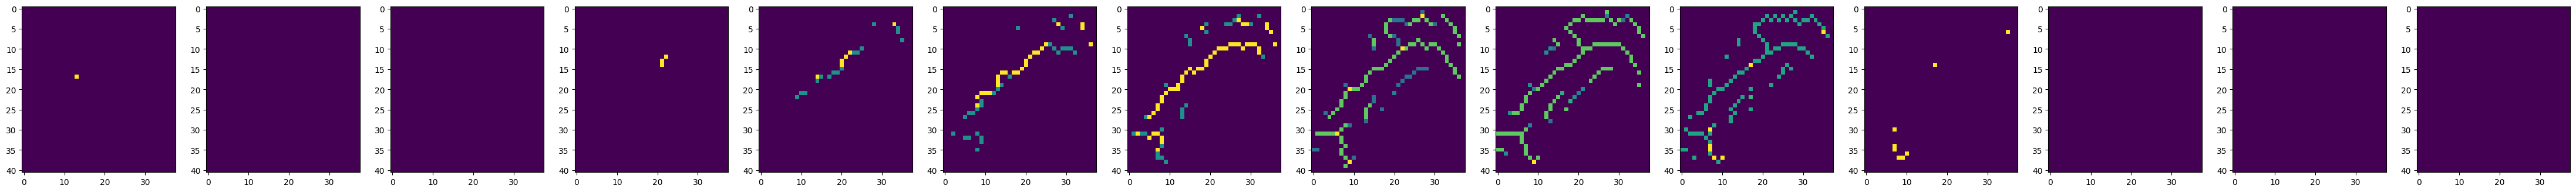

In [5]:
r = range(2,16)
Lskel=np.flip(Lskel,axis=0)
fig, axs = plt.subplots(figsize=(len(r)*4,4), ncols=len(r))
for idx, i in enumerate(r):
    axs[idx].imshow(Lskel[i,:,:,0])
plt.show()

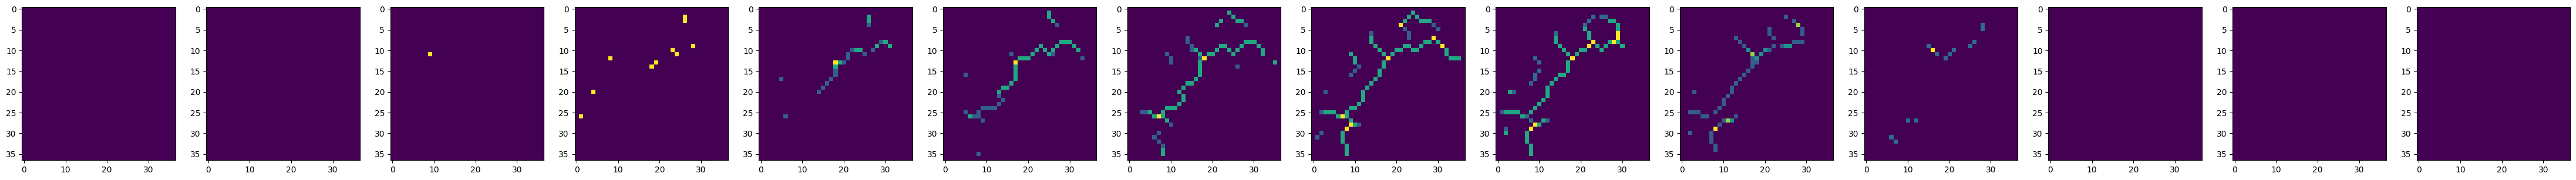

In [6]:
r = range(2,16)
fig, axs = plt.subplots(figsize=(len(r)*4,4), ncols=len(r))
for idx, i in enumerate(r):
    axs[idx].imshow(Rskel[i,:,:,0])
plt.show()

In [61]:
# flip Rskeleton.npy to input in left side trained network (axis = 0, or 1 if first dimension is subjects)
Rskeletons_flipped = np.flip(Rskeletons, axis=1)
np.save(os.path.join(crops_dir, 'CINGULATE_FLIPPED/mask/Rskeleton_flipped.npy'), Rskeletons_flipped)

In [63]:
# same with Rlabel
Rlabels = np.load(os.path.join(crops_dir, 'CINGULATE/mask/Rlabel.npy'))
Rlabels_flipped = np.flip(Rlabels, axis=1)
np.save(os.path.join(crops_dir, 'CINGULATE_FLIPPED/mask/Rlabels_flipped.npy'), Rlabels_flipped)

In [65]:
# and Rdistbottom
Rdistbottom = np.load(os.path.join(crops_dir, 'CINGULATE/mask/Rdistbottoms.npy'))
Rdistbottom_flipped = np.flip(Rdistbottom, axis=1)
np.save(os.path.join(crops_dir, 'CINGULATE_FLIPPED/mask/Rdistbottom_flipped.npy'), Rdistbottom_flipped)

FileNotFoundError: [Errno 2] No such file or directory: '/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/crops/2mm/CINGULATE/mask/Rdistbottoms.npy'

# GENERATE DATASET CONTAINING R AND L FROM PREEXISTING R AND L

In [4]:
def apply_padding(arr, final_shape, fill_value=0):
    """ See Padding.__call__().
    """
    orig_shape = arr.shape
    padding = []
    # print(f"SHAPES: {orig_shape} - {self.shape}")
    for orig_i, final_i in zip(orig_shape, final_shape):
        shape_i = final_i - orig_i
        half_shape_i = shape_i // 2
        if shape_i % 2 == 0:
            padding.append((half_shape_i, half_shape_i))
        else:
            padding.append((half_shape_i, half_shape_i + 1))
    for cnt in range(len(arr.shape) - len(padding)):
        padding.append((0, 0))

    fill_arr = np.pad(arr, padding, mode="constant",
                        constant_values=fill_value)
    return(fill_arr)

In [5]:
crops_dir = '/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/crops/2mm/'
#sulcus = 'CINGULATE'
sulcus = 'ORBITAL'

In [7]:
if not os.path.isdir(os.path.join(crops_dir, f'{sulcus}_ALL/mask/')):
    os.makedirs(os.path.join(crops_dir, f'{sulcus}_ALL/mask/'))

In [8]:
## apply padding on both sets !! take the max dims of each dim
Rskeletons = np.load(os.path.join(crops_dir, f'{sulcus}/mask/Rskeleton.npy'))
Lskeletons = np.load(os.path.join(crops_dir, f'{sulcus}/mask/Lskeleton.npy'))
dims = [max(el1, el2) for el1, el2 in zip(Rskeletons.shape[1:], Lskeletons.shape[1:])]

In [9]:
print(dims)

[30, 38, 23, 1]


In [10]:
# flip crops on UKB and merge
# need to flip right and pad

Rskeletons = np.flip(Rskeletons,axis=1)
shape = [Rskeletons.shape[0]] + dims
Rskeletons = apply_padding(Rskeletons, shape)
shape = [Lskeletons.shape[0]] + dims
Lskeletons = apply_padding(Lskeletons, shape)
full_skeletons = np.vstack((Lskeletons, Rskeletons))

In [11]:
np.save(os.path.join(crops_dir, f'{sulcus}_ALL/mask/ALLskeleton.npy'), full_skeletons)

In [13]:
# same on Rlabel
Rskeletons = np.load(os.path.join(crops_dir, f'{sulcus}/mask/Rlabel.npy'))
Lskeletons = np.load(os.path.join(crops_dir, f'{sulcus}/mask/Llabel.npy'))

Rskeletons = np.flip(Rskeletons,axis=1)
shape = [Rskeletons.shape[0]] + dims
Rskeletons = apply_padding(Rskeletons, shape)
shape = [Lskeletons.shape[0]] + dims
Lskeletons = apply_padding(Lskeletons, shape)
full_skeletons = np.vstack((Lskeletons, Rskeletons))

In [14]:
np.save(os.path.join(crops_dir, f'{sulcus}_ALL/mask/ALLlabel.npy'), full_skeletons)

In [ ]:
# same on distbottoms
Rskeletons = np.load(os.path.join(crops_dir, f'{sulcus}/mask/Rdistbottom.npy'))
Lskeletons = np.load(os.path.join(crops_dir, f'{sulcus}/mask/Ldistbottom.npy'))

Rskeletons = np.flip(Rskeletons,axis=1)
shape = [Rskeletons.shape[0]] + dims
Rskeletons = apply_padding(Rskeletons, shape, fill_value=32500)
shape = [Lskeletons.shape[0]] + dims
Lskeletons = apply_padding(Lskeletons, shape, fill_value=32500)
full_skeletons = np.vstack((Lskeletons, Rskeletons))

In [ ]:
np.save(os.path.join(crops_dir, f'{sulcus}_ALL/mask/ALLdistbottom.npy'), full_skeletons)

In [ ]:
# create the right CSVs
#skels
Rskeleton_subjects = pd.read_csv(os.path.join(crops_dir, f'{sulcus}/mask/Rskeleton_subject.csv'))
Lskeleton_subjects = pd.read_csv(os.path.join(crops_dir, f'{sulcus}/mask/Lskeleton_subject.csv'))
l = Rskeleton_subjects['Subject'].tolist()
l = [elem+'_Rflipped' for elem in l]
Rskeleton_subjects = pd.DataFrame({'Subject': l})
ALL_subjects = pd.concat((Lskeleton_subjects, Rskeleton_subjects))
ALL_subjects.to_csv(os.path.join(crops_dir, f'{sulcus}_ALL/mask/ALLskeleton_subject.csv'), index=False)

In [ ]:
#labels
Rskeleton_subjects = pd.read_csv(os.path.join(crops_dir, f'{sulcus}/mask/Rlabel_subject.csv'))
Lskeleton_subjects = pd.read_csv(os.path.join(crops_dir, f'{sulcus}/mask/Llabel_subject.csv'))
l = Rskeleton_subjects['Subject'].tolist()
l = [elem+'_Rflipped' for elem in l]
Rskeleton_subjects = pd.DataFrame({'Subject': l})
ALL_subjects = pd.concat((Lskeleton_subjects, Rskeleton_subjects))
ALL_subjects.to_csv(os.path.join(crops_dir, f'{sulcus}_ALL/mask/ALLlabel_subject.csv'), index=False)

In [ ]:
#distbottom
Rskeleton_subjects = pd.read_csv(os.path.join(crops_dir, f'{sulcus}/mask/Rdistbottom_subject.csv'))
Lskeleton_subjects = pd.read_csv(os.path.join(crops_dir, f'{sulcus}/mask/Ldistbottom_subject.csv'))
l = Rskeleton_subjects['Subject'].tolist()
l = [elem+'_Rflipped' for elem in l]
Rskeleton_subjects = pd.DataFrame({'Subject': l})
ALL_subjects = pd.concat((Lskeleton_subjects, Rskeleton_subjects))
ALL_subjects.to_csv(os.path.join(crops_dir, f'{sulcus}_ALL/mask/ALLdistbottom_subject.csv'), index=False)

In [ ]:
# train val subs
all_subjects = pd.read_csv(os.path.join(crops_dir, f'{sulcus}_ALL/mask/ALLskeleton_subject.csv'))
train_val_subjects = all_subjects.to_csv(os.path.join(crops_dir, f'{sulcus}_ALL/mask/train_val_subject.csv'), header=None, index=False)